In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/celestinesheum/Desktop/MY-DAC-Curriculum/Internal_Project/Heart.csv')

In [3]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [4]:
df.shape

(445132, 40)

In [5]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [6]:
# Removing duplicates
df = df.drop_duplicates()
print(df.shape)

(444975, 40)


In [7]:
# Logic checks
invalid_bmi = df[(df['BMI'] < 10) | (df['BMI'] > 80)]  # BMI typically ranges from 10 to 50
invalid_sleep = df[(df['SleepHours'] < 0) | (df['SleepHours'] > 24)]  # Sleep hours must be 0-24
suspicious_sleep_values = df[(df['SleepHours'] < 3) | (df['SleepHours'] > 22)] #maybe cap as outliers (?)


print(f"Invalid BMI entries: {len(invalid_bmi)}")
print(f"Invalid Sleep Hours entries: {len(invalid_sleep)}")
print(f"Suspicious sleep hours to check again: {len(suspicious_sleep_values)}")


#Creating an Accurate Calculated BMI column
df['CalculatedBMI'] = df['WeightInKilograms'] / (df['HeightInMeters'] ** 2)


Invalid BMI entries: 80
Invalid Sleep Hours entries: 0
Suspicious sleep hours to check again: 2773


In [8]:
# If AgeCategory is '65 or older', they should likely report having at least one of the following: Heart Attack, Stroke, or Diabetes
age_category_inconsistencies = df[
    (df['AgeCategory'] == '65 or older') &
    ~(df[['HadHeartAttack', 'HadStroke', 'HadDiabetes']].any(axis=1))
]
print(f"Number of inconsistencies with Age Category logic (age 65+ but no major health conditions): {len(age_category_inconsistencies)}")


Number of inconsistencies with Age Category logic (age 65+ but no major health conditions): 0


In [9]:
# If SmokerStatus is 'Yes', they should likely report at least one of these conditions
smoker_inconsistencies = df[
    (df['SmokerStatus'] == 'Yes') &
    ~(df[['HadHeartAttack', 'HadCOPD', 'HadAsthma', 'HadStroke']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Smoking status logic (smoker but no major related health conditions): {len(smoker_inconsistencies)}")

Number of inconsistencies with Smoking status logic (smoker but no major related health conditions): 0


In [10]:
# If DifficultyWalking is True, then at least one of DifficultyDressingBathing or DifficultyErrands should also be True
walking_inconsistencies = df[
    (df['DifficultyWalking'] == True) &
    ~(df[['DifficultyDressingBathing', 'DifficultyErrands']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Walking Difficulty logic (difficulty walking but no related difficulties): {len(walking_inconsistencies)}")


Number of inconsistencies with Walking Difficulty logic (difficulty walking but no related difficulties): 0


In [11]:
# If HadCOPD is True, then at least one of these three difficulties should also be True
copd_inconsistencies = df[
    (df['HadCOPD'] == True) &
    ~(df[['DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with COPD logic (COPD but no difficulties with daily activities): {len(copd_inconsistencies)}")

Number of inconsistencies with COPD logic (COPD but no difficulties with daily activities): 0


In [12]:
# If HadHeartAttack is True, then at least one of Stroke, Angina, or ChestScan should be True
heart_attack_inconsistencies = df[
    (df['HadHeartAttack'] == True) &
    ~(df[['HadStroke', 'HadAngina', 'ChestScan']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Heart Attack logic (Heart Attack but no related conditions reported): {len(heart_attack_inconsistencies)}")




Number of inconsistencies with Heart Attack logic (Heart Attack but no related conditions reported): 0


In [13]:
# If SleepHours is less than 4 or more than 12, we expect at least one of the health conditions to be True
sleep_hours_inconsistencies = df[
    ((df['SleepHours'] < 5) | (df['SleepHours'] > 12)) &
    ~(df[['HadDepressiveDisorder', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadSkinCancer', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating', 'HighRiskLastYear']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Sleep Hours logic (abnormal sleep but no related health conditions): {len(sleep_hours_inconsistencies)}")

Number of inconsistencies with Sleep Hours logic (abnormal sleep but no related health conditions): 4


In [14]:
# If PhysicalHealthDays is 0, they should not report significant limitations in daily activities
physical_health_inconsistencies = df[
    (df['PhysicalHealthDays'] == 0) &
    ~(df[['DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']].any(axis=1))  # No difficulty reported
]


In [15]:
print(f"Number of inconsistencies with Physical Health Days logic (0 health days but activity limitations): {len(physical_health_inconsistencies)}")


Number of inconsistencies with Physical Health Days logic (0 health days but activity limitations): 14233


In [16]:
# Fill in missing values for numerical + object columns
df.fillna({col: df[col].median() for col in df.select_dtypes('float64')}, inplace=True)
df.fillna({col: df[col].mode().iloc[0] for col in df.select_dtypes('object')}, inplace=True)


# print(df.isnull().sum()) #to check


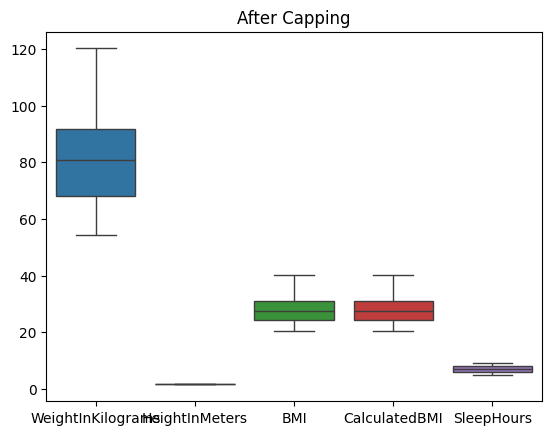

In [17]:
def cap_outliers(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for column in columns:
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
       
        # Apply capping
        df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))
   
    return df


# List of columns to cap
columns_to_cap = ['WeightInKilograms', 'HeightInMeters', 'BMI', 'CalculatedBMI', 'SleepHours']


# Apply the capping
df_cleaned = cap_outliers(df, columns_to_cap)


# Verification of capping
sns.boxplot(data=df[columns_to_cap])
plt.title("After Capping")
plt.show()


In [18]:
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col] = df[col].str.strip().str.lower()


In [19]:
df_2ndremove_duplicates = df.drop_duplicates()


In [20]:
df_2ndremove_duplicates.to_csv('Heart_cleaned.csv', index=False)
